# Informe Hito 1
### Grupo 3 - Proyecto mineros: Credit Card Transactions
#### Integrantes:
- Sofía Araya
- Bastián Araneda
- Ian Armstrong
- Alejandra Campos
- Felipe Cárdenas

---

El dataset escogido para el proyecto semestral se trata de transacciones con tarjetas de crédito generadas a partir de una simulación de un mundo virtual por IBM. Incluye más de 20 millones de transacciones realizadas por 2000 consumidores sintéticos que residen en los Estados Unidos y que viajan por el mundo. Las transacciones fueron realizadas entre los anios 2000 y 2020, e incluye múltiples tarjetas de crédito por consumidor, lo que permite su análisis en contextos como la detección de fraudes y el estudio de patrones de compra.

## Sobre los Datos Sintéticos

Por razones de privacidad y seguridad, existe una reducida cantidad datos bancarios reales disponibles para uso público, por lo que no hay suficientes disponibles para análisis y/o minería de éstos. Como solución a esto, un grupo de investigadores de IBM construyeron un modelo del mercado Estadounidense, con énfasis en las transacciones y comportamientos de personas indviduales, que genera datos cuyo comportamiento general corresponde a las estadísticas disponibles respecto a transacciones bancarias.

Es importante notar que a pesar de que el paper fué publicado durante 2019, no hay ninguna mención a la pandemia de COVID-19, por lo que probablemente no se incluyen sus efectos en los datos generados para 2019 ni 2020.

El paper que describe la generación de éstos datos se puede encontrar [aquí](https://arxiv.org/abs/1910.03033).

## Motivación

Actualmente, la mayoría de personas manejama nuestro dinero de manera virtual, y el uso de tarjetas de crédito y débito se ha popularizado enormemente en los últimos años. Este crecimiento lleva a pensar que, en un futuro no muy lejano, las transacciones bancarias serán completamente virtuales. Sin embargo, éste aumento también ha traído consigo un problema: el fraude financiero, que ha crecido a la par de estas transacciones.

Este proyecto busca entender mejor estos fraudes a través del análisis de datos de transacciones bancarias. El _dataset_ que se está trabajando abarca transacciones desde 1991 hasta 2020, con cerca de 24 millones de instancias diferentes.

Uno de los principales objetivos es poder predecir si una transacción dada es o no fraudulenta, con énfasis particular en las transacciones hechas en línea.

## Presentacion de los datos
El _dataset_ presenta sus datos distribuidos en 4 tablas:
- df_max: Todas las transacciones de credito con sus detalles (fecha, hora, monto, tipo, etc), de mas de 24 millones de filas
- df_min: extracto de la tabla df_max
- df_users: detalles de los 2000 usuarios de las tarjetas
- df_cards: tabla con las caracteristicas de cada tarjeta usada para las transacciones

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df_min = pd.read_csv('drive/My Drive/User0_credit_card_transactions.csv')
df_max = pd.read_csv('drive/My Drive/credit_card_transactions-ibm_v2.csv')
df_cards = pd.read_csv('drive/My Drive/sd254_cards.xls')
df_users = pd.read_csv('drive/My Drive/sd254_users.xls')

df=df_max

# map to bool
df['Is Fraud?'] = df['Is Fraud?'].map({'Yes':True, 'No':False})

# map to float
df["Amount"]=df["Amount"].str.replace('$', '')
df["Amount"]=df["Amount"].astype(float)

fraud_transactions = df[df['Is Fraud?']]

In [3]:
%pip install matplotlib
%pip install seaborn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('bmh')

## Analisis Estadistico:
A continuacion se presenta una tabla con resultados estadisticos sobre las transacciones, como el promedio, la media y la desviación estandar.

In [4]:
df_max.describe()

,User,Card,Year,Month,Day,Amount,Merchant Name,Zip,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.150876e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,4.363401e+01,-4.769230e+17,5.095644e+04,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,8.202239e+01,4.758940e+18,2.939707e+04,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-5.000000e+02,-9.222899e+18,5.010000e+02,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,9.200000e+00,-4.500543e+18,2.837400e+04,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,3.014000e+01,-7.946765e+17,4.674200e+04,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,6.506000e+01,3.189517e+18,7.756400e+04,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,1.239050e+04,9.223292e+18,9.992800e+04,9.402000e+03


Es importante notar que las transacciones fraudulentas (aproximadamente 30.000) corresponden a un porcentaje mínimo de las transacciones totales (alrededor de 24 millones), aproximadamente el 0,1%.

<Axes: title={'center': 'Porcentaje de Fraudes en transacciones'}>

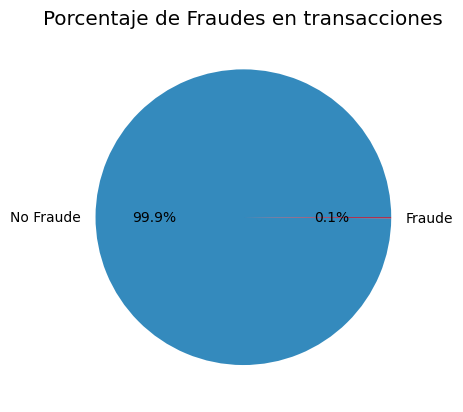

In [5]:
count = df["Is Fraud?"].value_counts()
count.index = count.index.map({True:"Fraude", False:"No Fraude"})
count.plot.pie(legend=False,ylabel="",title="Porcentaje de Fraudes en transacciones", autopct="%1.1f%%")

Si nos fijamos solamente en las transacciones online, el porcentaje de fraude es un poco mayor, y podría ser algo mas fácil solucionar algunos problemas en este contexto mas reducido, como puede ser el predecir fraudes.

<Axes: title={'center': 'Porcentaje de Fraudes en transacciones online'}>

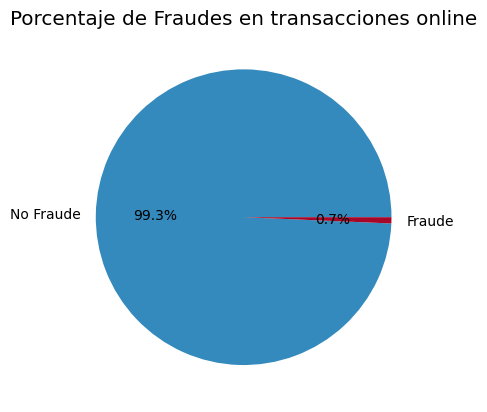

In [6]:
count = df.loc[df["Use Chip"]=="Online Transaction"]["Is Fraud?"].value_counts()
count.index = count.index.map({True:"Fraude", False:"No Fraude"})
count.plot.pie(legend=False,ylabel="",title="Porcentaje de Fraudes en transacciones online", autopct="%1.1f%%")

### Transacciones a traves de los años

En el primer histograma se puede ver como la cantidad de transacciones bancarias aumenta en el tiempo.

En el segundo se puede ver como la cantidad de transacciones fraudulentas va, en general, aumentando a lo largo del tiempo, pero de forma menos marcada que el total. Además parece crecer mas desde los 2000 en adelante, con el inicio de la era digital.



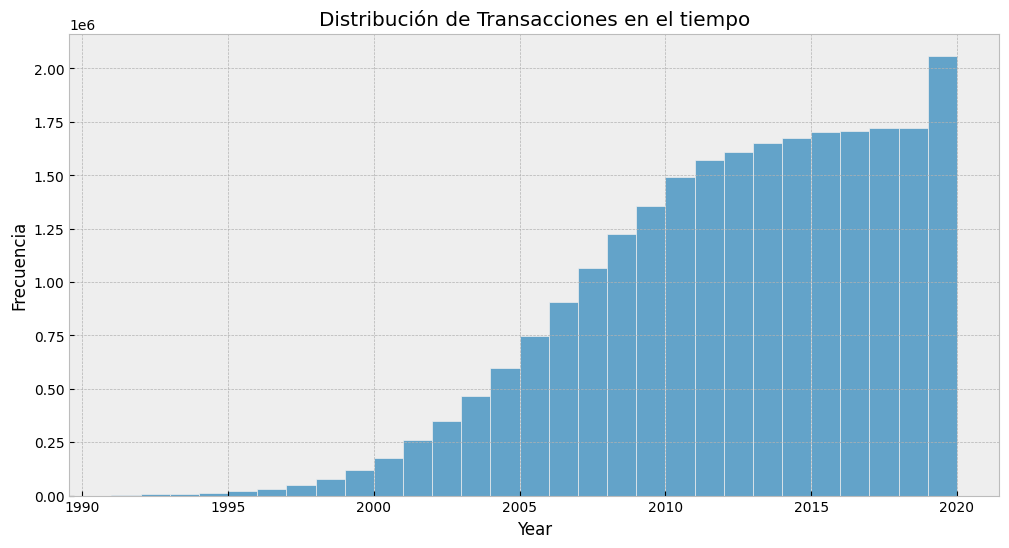

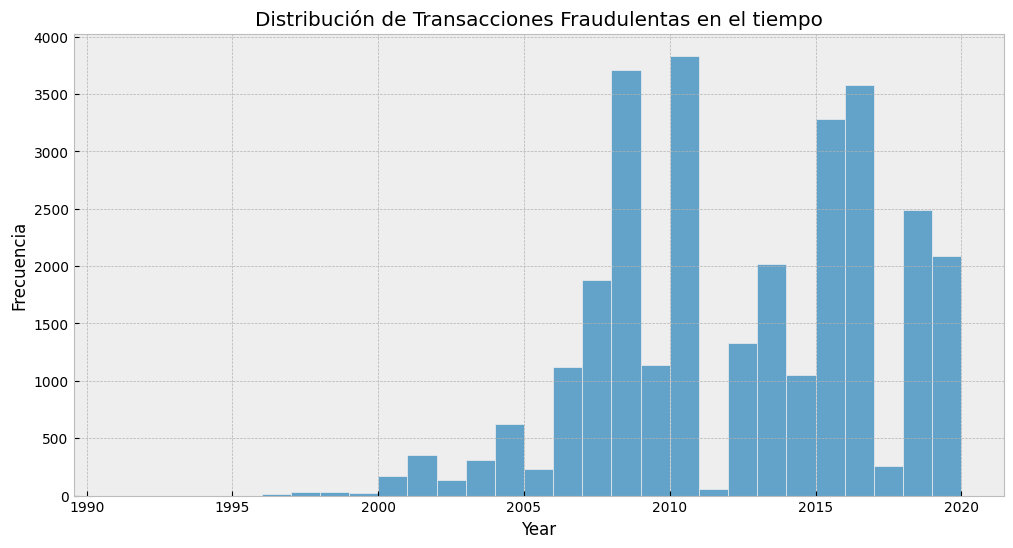

In [7]:
plt.figure(figsize=(12, 6))
# NO FRAUDE
# una barrita por año de datos
bins=df['Year'].max()-df['Year'].min()
sns.histplot(df['Year'], bins=bins, kde=False)
plt.title('Distribución de Transacciones en el tiempo')
plt.xlabel('Year')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
# FRAUDE
# una barrita por año de datos
sns.histplot(fraud_transactions['Year'], bins=bins, kde=False, binrange=[df['Year'].min(), df["Year"].max()])
plt.title('Distribución de Transacciones Fraudulentas en el tiempo')
plt.xlabel('Year')
plt.ylabel('Frecuencia')
plt.show()

## Frecuencia de las cantidades de dinero de las transacciones fraudulentas

En este histograma podemos identificar aquellas transacciones  fraudulentas con montos negativos que pueden ser estudiados más adelante para su entendimiento. También podemos ver que los fraudes transaccionales se mueven en torno al rango de los -\$500 hasta los \$1.300 aproximadamente.

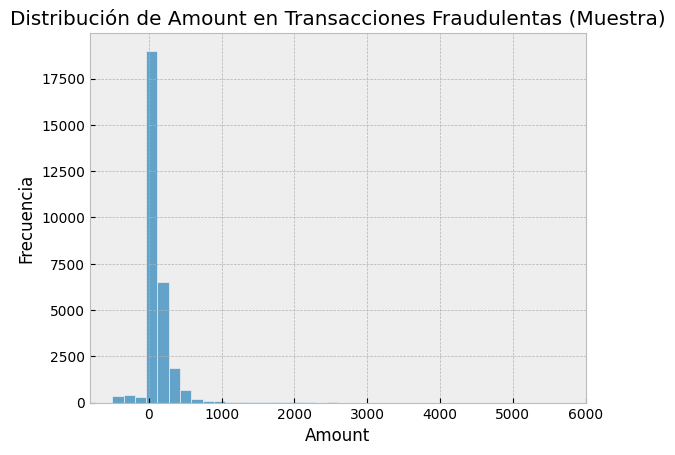

In [8]:
sns.histplot(fraud_transactions['Amount'], bins=40, kde=False)
plt.title('Distribución de Amount en Transacciones Fraudulentas (Muestra)')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')
plt.show()

### Tipo de Transacción según legitimidad:

Analizando los siguientes gráficos de torta en conjunto se ve que al filtrar la base de datos por transacciones fraudulentas, la proporción de transacciones online incrementa significativamente pasando de un 11% a un 62% lo que sugiere que las transacciones _online_ son un objetivo llamativo para el fraude de dinero.

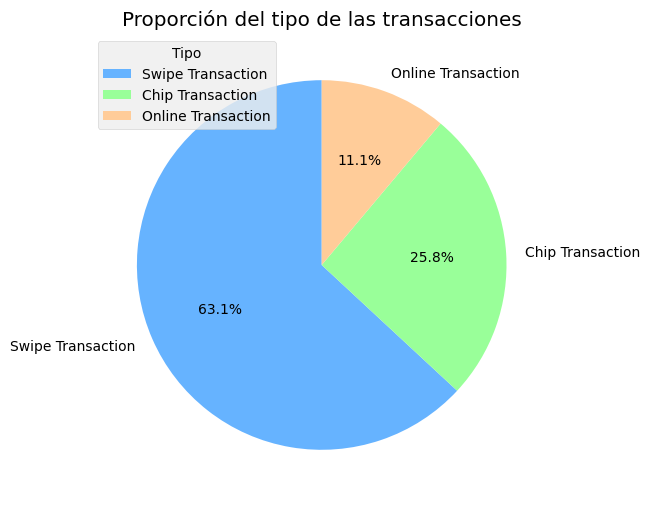

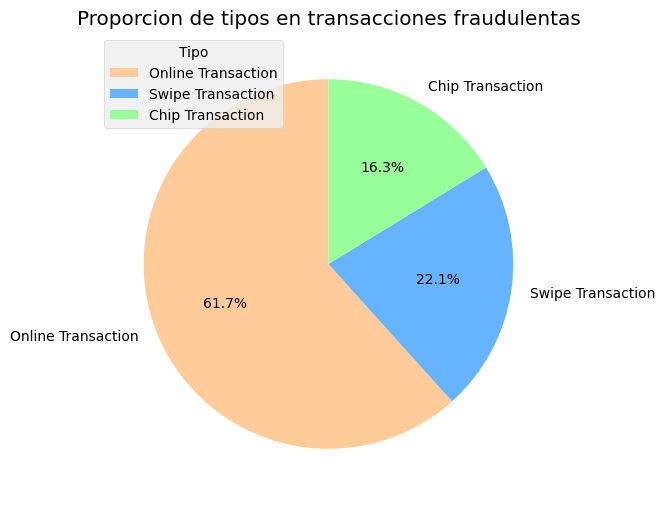

In [9]:
# TODAS
# Contar las ocurrencias de cada valor en la columna 'Use Chip'
use_chip_counts = df['Use Chip'].value_counts()
# Crear el gráfico de torta con tres colores
colors = ['#66b3ff', '#99ff99', '#ffcc99']
plt.figure(figsize=(6, 6))
plt.pie(use_chip_counts, labels=use_chip_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
# Añadir un título
plt.title('Proporción del tipo de las transacciones')
# Añadir la leyenda
plt.legend(title="Tipo", loc="upper left", labels=use_chip_counts.index)
# Mostrar el gráfico
plt.show()

# SOLO FRAUDE
# Contar las ocurrencias de cada valor en la columna 'Use Chip'
use_chip_counts = fraud_transactions['Use Chip'].value_counts()
# Crear el gráfico de torta con tres colores
colors = ['#ffcc99', '#66b3ff', '#99ff99']
plt.figure(figsize=(6, 6))
plt.pie(use_chip_counts, labels=use_chip_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
# Añadir un título
plt.title('Proporcion de tipos en transacciones fraudulentas')
# Añadir la leyenda
plt.legend(title="Tipo", loc="upper left", labels=use_chip_counts.index)
# Mostrar el gráfico
plt.show()

### Compras Online y procentaje de fraudes vs. Edad

En el siguiente gráfico podemos ver un histograma de compras online para distintas edades, junto con la distribución del porcentaje de fraudes para las mismas edades.
Podemos ver que en general a mayor edad, va aumentando el porcentaje de fraude, llegando a ser sobre 3% para personas de edades avanzadas.

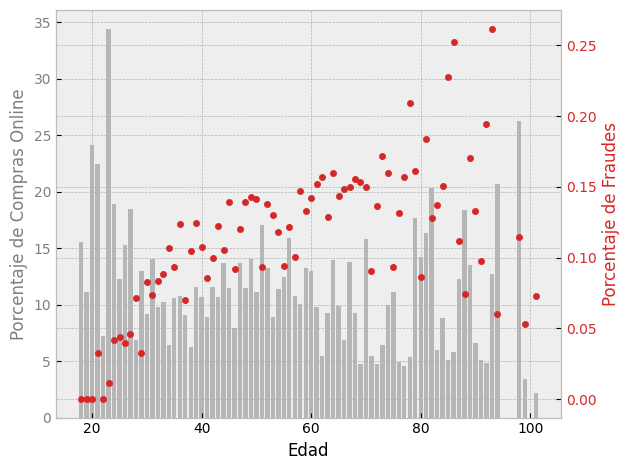

In [10]:
df_calc = df[["User", "Is Fraud?", "Use Chip"]].merge(df_users.rename_axis('User').reset_index()[["Current Age", "User"]], how="inner", on="User")
df_calc["Online"] = df_calc["Use Chip"].map({"Online Transaction": True, "Swipe Transaction": False, "Chip Transaction": False})

# Agrupar por edad y contar la cantidad total de transacciones totales, online y fraudes
df_calc = df_calc.groupby("Current Age").agg(
    Total=("Is Fraud?", "count"),
    Online=("Online", "sum"),
    Fraudes=("Is Fraud?", "sum")
).reset_index()
df_calc["Porcentaje_Fraudes"] = (df_calc["Fraudes"] / df_calc["Total"]) * 100
df_calc["Porcentaje_Online"] = (df_calc["Online"] / df_calc["Total"]) * 100

fig, ax2 = plt.subplots()

color = 'tab:gray'
ax2.set_xlabel('Edad')
ax2.set_ylabel('Porcentaje de Compras Online', color=color)  # we already handled the x-label with ax1
#ax2.bar(t, data2, color="gray", alpha=0.5, label="Compras Online", zorder=0)
bins = df_calc["Current Age"].max()-df_calc["Current Age"].min()
ax2.bar(df_calc["Current Age"],df_calc["Porcentaje_Online"], color="gray", alpha=0.5, label="Porcentaje Online", zorder=0)
ax2.tick_params(axis='y', labelcolor=color)

ax1 = ax2.twinx()  # inst

color = 'tab:red'
ax1.set_ylabel('Porcentaje de Fraudes', color=color)
ax1.scatter(df_calc["Current Age"], df_calc["Porcentaje_Fraudes"], color=color, label="Porcentaje Fraudes", s=20, zorder=10)
ax1.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Preguntas y Problemas

En este dataset se pueden plantear y desarrollar preguntas que corresponden a dos objetivos:

- ¿Es posible predecir si una transacción dada es fraudulenta o no?
  - ¿Existe un periodo de tiempo (hora, dia de la semana, mes) en el que sea más probable que ocurra un fraude?
  - ¿Hay algún tipo de transacción más vulnerable a fraudes?
  - ¿El uso de múltiples tarjetas por un consumidor aumenta el riesgo de fraude?
  - ¿Influye el monto de la transacción en la probabilidad de ser fraude?
  - ¿Las transacciones internacionales presentan un mayor riesgo en comparación con las nacionales?

- ¿Qué tipo de persona es más probable que sufra este tipo de estafa?
    - ¿Es la edad un factor de riesgo?
    - ¿Hay más fraudes entre personas que usan menos transacciones _online_?

Reconocer los patrones en los fraudes es de gran valor, ya que permitiría predecir futuros eventos y ayudar a prevenirlos, resguando así la seguridad de los usuarios de tarjetas bancarias.
Para ello, se espera utilizar técnicas de minería de datos como la clasificación y la regresión en las siguientes etapas de nuestro proyecto.

# Contribuciones

Investigacion del dataset: Sofia Araya y Felipe Cardenas \
Confeccion de graficos 1, 4, 5, 6 y 7: Bastian Araneda \
Confeccion de graficos 2, 3: Ian Armstrong \
Confeccion de grafico 8: Felipe Cardenas \
Redaccion informe: Alejandra Campos Urbina \
Revision y edicion informe: Ian Armstrong
Elaboracion presentacion: Sofia Araya \
Presentacion presencial del hito: Ian Armstrong y Bastian Araneda
